<a href="https://colab.research.google.com/github/AndreNasci/TinyML/blob/main/List_2_TF_with_Mutiple_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# List 2 - TF with Multiple Layers
André Augusto César do Nascimento <br>
2018001244

### First model - 1 neuron, 1 layer

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.12.0


In [8]:
# Layer code - Neural network with one neuron
my_layer = tf.keras.layers.Dense(units=1, input_shape=[1])

# tf.keras.Sequential = groups a linear stack of layers into a tf.keras.model
model = tf.keras.Sequential([my_layer])

# compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [9]:
# Dataset
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model - 500 steps/epochs
# Learning the internal parameters of the neuron
model.fit(xs, ys, epochs=500)

In [16]:
# Predict a value
print(model.predict([10.0]))

1/1 [==============================] - 0s 38ms/step
[[18.98262]]


In [18]:
# Inspecting the neuron
print(my_layer.get_weights())
# [w value, b value]

[array([[1.9974812]], dtype=float32), array([-0.992191], dtype=float32)]


In [20]:
# Saving model to analyse
model.save('first_model.h5')

### Second model - 3 neurons, 2 layers

In [23]:
# Creating layers
my_layer_1 = tf.keras.layers.Dense(units=2, input_shape=[1])
my_layer_2 = tf.keras.layers.Dense(units=1)

# Composing and compiling the model
model = tf.keras.Sequential([my_layer_1, my_layer_2])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [25]:
# Model description
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 4         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Dataset
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the model
model.fit(xs, ys, epochs=500)

In [26]:
# Inspecting the neurons
print("Layer 1:", my_layer_1.get_weights())
print("Layer 2:", my_layer_2.get_weights())
# [w values, b values]

Layer 1: [array([[1.464588  , 0.26778272]], dtype=float32), array([-0.38417536,  0.1968715 ], dtype=float32)]
Layer 2: [array([[ 1.5213453],
       [-0.8519761]], dtype=float32), array([-0.24780574], dtype=float32)]


w -> 1 per input <br>
b -> 1 per neuron

The neuron in the second layer has 2 inputs. <br>
y = w1x1 + w2x2 + b

In [30]:
# Inspecting the outputs manually

value_to_predict = 10.0

layer1_w1 = (my_layer_1.get_weights()[0][0][0])
layer1_w2 = (my_layer_1.get_weights()[0][0][1])
layer1_b1 = (my_layer_1.get_weights()[1][0])
layer1_b2 = (my_layer_1.get_weights()[1][1])

layer2_w1 = (my_layer_2.get_weights()[0][0])
layer2_w2 = (my_layer_2.get_weights()[0][1])
layer2_b = (my_layer_2.get_weights()[1][0])

neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1
neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2
neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b

print(neuron3_output)

[18.999996]


In [31]:
# Saving model to analyse
model.save('second_model.h5')

### List 2 Deliveries

a) Done above

b) New model with the following layers: <br>
`my_layer_1 = tf.keras.layers.Dense(units=2, input_shape=[1])`<br>
`my_layer_2 = tf.keras.layers.Dense(units=2, input_shape=[1])`<br>
`my_layer_3 = tf.keras.layers.Dense(units=1)`

In [121]:
# Creating layers
my_layer_1 = tf.keras.layers.Dense(units=2, input_shape=[1])
my_layer_2 = tf.keras.layers.Dense(units=2, input_shape=[1])
my_layer_3 = tf.keras.layers.Dense(units=1)

# Composing and compiling the model
model = tf.keras.Sequential([my_layer_1, my_layer_2, my_layer_3])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [122]:
# Model description
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 2)                 4         
                                                                 
 dense_38 (Dense)            (None, 2)                 6         
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [123]:
predictions = []
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    predictions.append(model.predict(xs))
callbacks = myCallback()

In [124]:
# Dataset
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the model - the amount of epochs was reduced to avoid overfit
history = model.fit(xs, ys, epochs=100, callbacks=[callbacks], verbose=0)
#model.fit(xs, ys, epochs=100)

1/1 [==============================] - 0s 23ms/step


In [125]:
# Inspecting the neurons
print("Layer 1:\n", my_layer_1.get_weights())
print("Layer 2:\n", my_layer_2.get_weights())
print("Layer 3:\n", my_layer_3.get_weights())
# [w values, b values]

Layer 1:
 [array([[0.76912796, 1.4479206 ]], dtype=float32), array([ 0.14641052, -0.18567443], dtype=float32)]
Layer 2:
 [array([[ 0.8954161, -0.9164459],
       [-1.1371545,  1.1238066]], dtype=float32), array([ 0.05493158, -0.10728768], dtype=float32)]
Layer 3:
 [array([[-0.72173893],
       [ 1.418624  ]], dtype=float32), array([-0.07483255], dtype=float32)]


In [126]:
# Testing the model
value_to_predict = 10.0
print(model.predict([value_to_predict]))

1/1 [==============================] - 0s 49ms/step
[[18.997145]]


In [127]:
# Inspecting the outputs manually

# Layer 1
  # Neuron 1
layer1_w1 = (my_layer_1.get_weights()[0][0][0])
layer1_b1 = (my_layer_1.get_weights()[1][0])
  # Neuron 2
layer1_w2 = (my_layer_1.get_weights()[0][0][1])
layer1_b2 = (my_layer_1.get_weights()[1][1])

# Layer 2
  # Neuron 3
layer2_w1 = (my_layer_2.get_weights()[0][0][0])
layer2_w2 = (my_layer_2.get_weights()[0][1][0])
layer2_b1 = (my_layer_2.get_weights()[1][0])
  # Neuron 4
layer2_w3 = (my_layer_2.get_weights()[0][0][1])
layer2_w4 = (my_layer_2.get_weights()[0][1][1])
layer2_b2 = (my_layer_2.get_weights()[1][1])

# Layer 3
  # Neuron 5
layer3_w1 = (my_layer_3.get_weights()[0][0])
layer3_w2 = (my_layer_3.get_weights()[0][1])
layer3_b = (my_layer_3.get_weights()[1][0])

# OUTPUTS
  # Layer 1
neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1
neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2
  # Layer 2
neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b1
neuron4_output = (layer2_w3 * neuron1_output) + (layer2_w4 * neuron2_output) + layer2_b2 
  # Layer 3
neuron5_output = (layer3_w1 * neuron3_output) + (layer3_w2 * neuron4_output) + layer3_b

print(neuron5_output)

[18.997143]


In [128]:
# Saving model to analyse
model.save('third_model.h5')

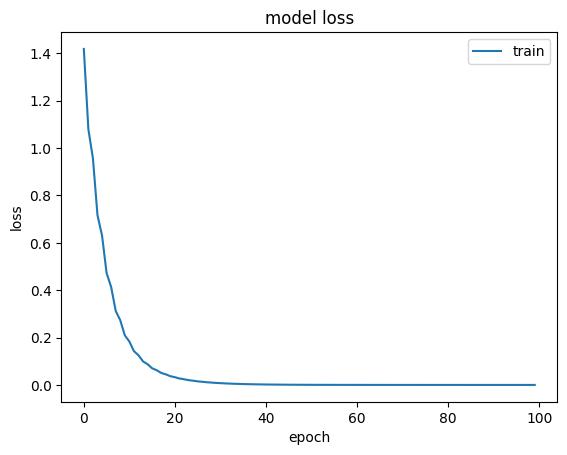

In [129]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()